# Overfitting and underfitting

#### Overfit

When the model adapts to the particularities of the training set. We want to generalize it for better performance in unknown data.

It can happen when:
- we train the model for too long (the validation accuracy hits a peak and starts decreasing)
- the model has too much freedom (too many layers or hidden units)

Solutions:
1. Train on large datasets
2. Use regularization
3. Find the best training duration

#### Underfit

When there is still room for improvement on test data.

It can happen when:
- the model is not powerful enough
- it is overregularized
- was not trained enough


In [2]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.13.1


## Preprocessing

We will use the IMDB review dataset with multi-hot encoding (\[3, 5\] => \[000101000...00\])  instead of embedding. The model will quickly overfit.

In [3]:
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # set specific indices of results[i] to 1s
    return results


train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

Since the words are sorted byt frequence, we expect more 1's near index 0

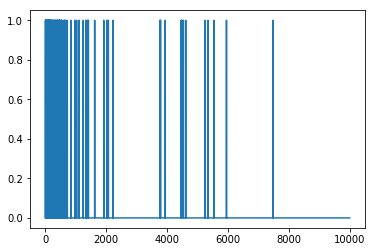

In [4]:
plt.plot(train_data[0])

## About overfitting

The simplest way to prevent overfitting is to reduce the size (**capacity** = number of learnable parameters = number of layers and units) so that it will focus on more important patterns with more predictive power.

To find the best architecture, the best is to start with just a few layers and units and then increase them until validation loss stops improving.

####  Baseline model

In [5]:
baseline_model = keras.Sequential([
    # `input_shape` is only required here so that `.summary` works. 
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [6]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Train on 25000 samples, validate on 25000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
 - 9s - loss: 0.5510 - acc: 0.7297 - binary_crossentropy: 0.5510 - val_loss: 0.3996 - val_acc: 0.8672 - val_binary_crossentropy: 0.3996
Epoch 2/20
 - 6s - loss: 0.2856 - acc: 0.9090 - binary_crossentropy: 0.2856 - val_loss: 0.2907 - val_acc: 0.8878 - val_binary_crossentropy: 0.2907
Epoch 3/20
 - 5s - loss: 0.1938 - acc: 0.9344 - binary_crossentropy: 0.1938 - val_loss: 0.2906 - val_acc: 0.8826 - val_binary_crossentropy: 0.2906
Epoch 4/20
 - 5s - loss: 0.1526 - acc: 0.9489 - binary_crossentropy: 0.1526 - val_loss: 0.3172 - val_acc: 0.8747 - val_binary_crossentropy: 0.3172
Epoch 5/20
 - 5s - loss: 0.1211 - acc: 0.9618 - binary_crossentropy: 0.1211 - val_loss: 0.3284 - val_acc: 0.8764 - val_binary_crossentropy: 0.3284
Epoch 6/20
 - 5s - loss: 0.0960 - acc: 0.9724 - binary_crossentropy: 0.0960 - val_loss: 0.3624 - val_acc: 0.8721 - val_binary_crossentropy: 0.3624
Epoch 7/20
 - 5s - l

#### Smaller model

In [8]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

smaller_model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [9]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 5s - loss: 0.5750 - acc: 0.7812 - binary_crossentropy: 0.5750 - val_loss: 0.4725 - val_acc: 0.8523 - val_binary_crossentropy: 0.4725
Epoch 2/20
 - 5s - loss: 0.3830 - acc: 0.8903 - binary_crossentropy: 0.3830 - val_loss: 0.3651 - val_acc: 0.8788 - val_binary_crossentropy: 0.3651
Epoch 3/20
 - 4s - loss: 0.2924 - acc: 0.9108 - binary_crossentropy: 0.2924 - val_loss: 0.3196 - val_acc: 0.8838 - val_binary_crossentropy: 0.3196
Epoch 4/20
 - 4s - loss: 0.2421 - acc: 0.9240 - binary_crossentropy: 0.2421 - val_loss: 0.2963 - val_acc: 0.8869 - val_binary_crossentropy: 0.2963
Epoch 5/20
 - 5s - loss: 0.2089 - acc: 0.9345 - binary_crossentropy: 0.2089 - val_loss: 0.2868 - val_acc: 0.8886 - val_binary_crossentropy: 0.2868
Epoch 6/20
 - 5s - loss: 0.1856 - acc: 0.9409 - binary_crossentropy: 0.1856 - val_loss: 0.2830 - val_acc: 0.8873 - val_binary_crossentropy: 0.2830
Epoch 7/20
 - 4s - loss: 0.1667 - acc: 0.9476 - binary_crossentropy:

#### Bigger model

In [10]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [11]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 13s - loss: 0.3474 - acc: 0.8524 - binary_crossentropy: 0.3474 - val_loss: 0.3003 - val_acc: 0.8764 - val_binary_crossentropy: 0.3003
Epoch 2/20
 - 13s - loss: 0.1482 - acc: 0.9455 - binary_crossentropy: 0.1482 - val_loss: 0.3353 - val_acc: 0.8723 - val_binary_crossentropy: 0.3353
Epoch 3/20
 - 13s - loss: 0.0527 - acc: 0.9845 - binary_crossentropy: 0.0527 - val_loss: 0.4513 - val_acc: 0.8674 - val_binary_crossentropy: 0.4513
Epoch 4/20
 - 13s - loss: 0.0081 - acc: 0.9987 - binary_crossentropy: 0.0081 - val_loss: 0.5793 - val_acc: 0.8670 - val_binary_crossentropy: 0.5793
Epoch 5/20
 - 13s - loss: 9.8350e-04 - acc: 1.0000 - binary_crossentropy: 9.8350e-04 - val_loss: 0.6677 - val_acc: 0.8696 - val_binary_crossentropy: 0.6677
Epoch 6/20
 - 13s - loss: 2.7257e-04 - acc: 1.0000 - binary_crossentropy: 2.7257e-04 - val_loss: 0.7101 - val_acc: 0.8707 - val_binary_crossentropy: 0.7101
Epoch 7/20
 - 13s - loss: 1.6248e-04 - acc: 1.

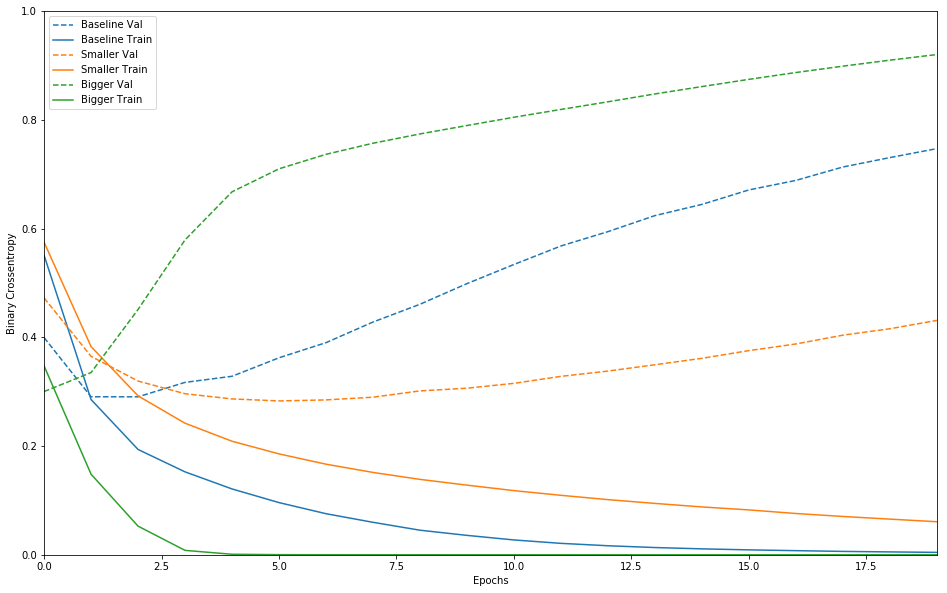

In [25]:
def plot_history(histories, key='binary_crossentropy', y_min=0):
    plt.figure(figsize=(16,10))

    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                       '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
                 label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()

    plt.xlim([0,max(history.epoch)])
    plt.ylim([y_min, 1])


plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

The bigger network starts to overfit after one epoch and much more severly. The smaller starts to overfit after the baseline and more slowly. So more capacity, means low training loss and high suceptibility to overfit (large difference between training and validation loss).

## Strategies

### Weight regularization

The simpler models are usually the best against overfitting. So if it has less parameters or if they have less entropy it is simpler. Thus forcing the weights to take small values, makes the distribution more "regular".

This is done by adding to the loss function a cost associated to large weights. There are two possibilities:
- L1 regularization: cost added is proportional to the weights (L1 norms)
- L2 regularization (weight decay): cost added is proportional to the square of the weights (L2 norms)

In [17]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 13s - loss: 0.5408 - acc: 0.8100 - binary_crossentropy: 0.4991 - val_loss: 0.3933 - val_acc: 0.8744 - val_binary_crossentropy: 0.3490
Epoch 2/20
 - 10s - loss: 0.3147 - acc: 0.9056 - binary_crossentropy: 0.2651 - val_loss: 0.3402 - val_acc: 0.8864 - val_binary_crossentropy: 0.2868
Epoch 3/20
 - 7s - loss: 0.2606 - acc: 0.9268 - binary_crossentropy: 0.2045 - val_loss: 0.3411 - val_acc: 0.8857 - val_binary_crossentropy: 0.2834
Epoch 4/20
 - 6s - loss: 0.2379 - acc: 0.9383 - binary_crossentropy: 0.1784 - val_loss: 0.3566 - val_acc: 0.8808 - val_binary_crossentropy: 0.2959
Epoch 5/20
 - 5s - loss: 0.2226 - acc: 0.9453 - binary_crossentropy: 0.1610 - val_loss: 0.3671 - val_acc: 0.8780 - val_binary_crossentropy: 0.3047
Epoch 6/20
 - 5s - loss: 0.2108 - acc: 0.9505 - binary_crossentropy: 0.1475 - val_loss: 0.3778 - val_acc: 0.8766 - val_binary_crossentropy: 0.3141
Epoch 7/20
 - 5s - loss: 0.2035 - acc: 0.9524 - binary_crossentrop

l2(0.001) means that every weight in the weight matrix will add 0.001w^2 to the total loss. Because of this the loss during training is much higher than during testing.

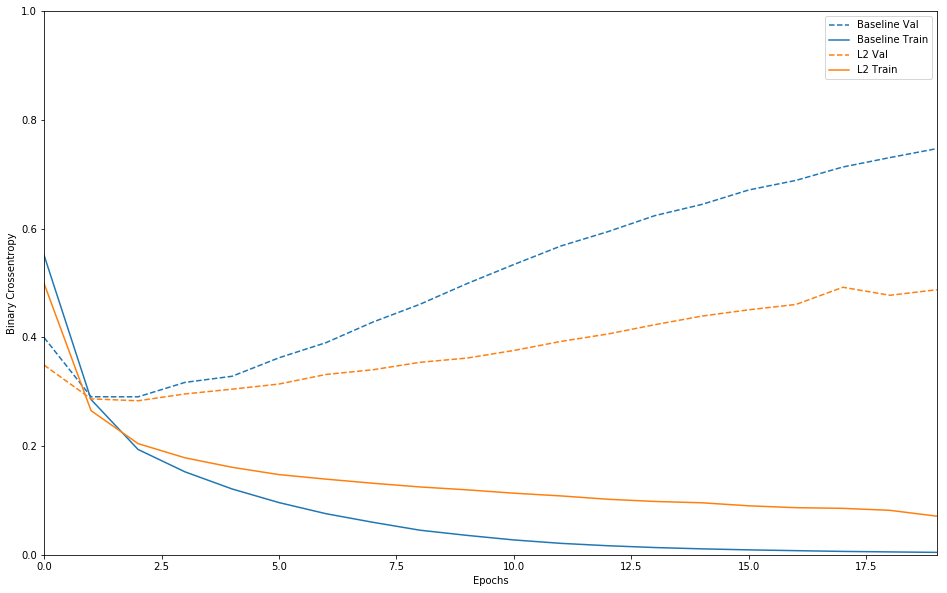

In [18]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

### Dropout

One of the most effective regularization techniques. It consistis on dropping out (i.e. set to zero) some output features of the layer during training randomly.

Ex.: A layer output \[0.2, 0.5, 1.3, 0.8, 1.1\] =>  \[0, 0.5, 1.3, 0, 1.1\] (random case)

The "dropout rate" is the fraction of features to  be set to zero (usually between \[0.2, 0.5\]). This is not done during testing, instead outputs are scaled down by the dropout rate to compensate.

In [19]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 6s - loss: 0.6257 - acc: 0.6358 - binary_crossentropy: 0.6257 - val_loss: 0.5048 - val_acc: 0.8404 - val_binary_crossentropy: 0.5048
Epoch 2/20
 - 5s - loss: 0.4588 - acc: 0.7988 - binary_crossentropy: 0.4588 - val_loss: 0.3425 - val_acc: 0.8812 - val_binary_crossentropy: 0.3425
Epoch 3/20
 - 5s - loss: 0.3584 - acc: 0.8689 - binary_crossentropy: 0.3584 - val_loss: 0.3005 - val_acc: 0.8888 - val_binary_crossentropy: 0.3005
Epoch 4/20
 - 5s - loss: 0.2999 - acc: 0.8978 - binary_crossentropy: 0.2999 - val_loss: 0.2837 - val_acc: 0.8889 - val_binary_crossentropy: 0.2837
Epoch 5/20
 - 5s - loss: 0.2615 - acc: 0.9140 - binary_crossentropy: 0.2615 - val_loss: 0.2843 - val_acc: 0.8884 - val_binary_crossentropy: 0.2843
Epoch 6/20
 - 5s - loss: 0.2286 - acc: 0.9278 - binary_crossentropy: 0.2286 - val_loss: 0.2928 - val

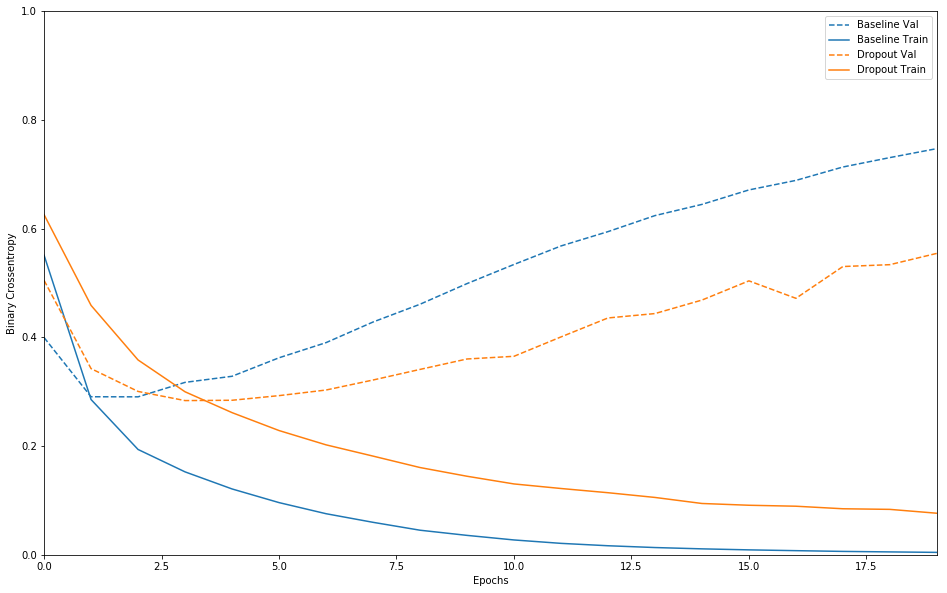

In [20]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])

In [30]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

all_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001), activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001), activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

all_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

all_model_history = all_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=1,
                                  callbacks=[early_stop])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=1,
                                  callbacks=[early_stop])

l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=1,
                                callbacks=[early_stop])

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 6s 239us/sample - loss: 0.6735 - acc: 0.6304 - binary_crossentropy: 0.6366 - val_loss: 0.5450 - val_acc: 0.8464 - val_binary_crossentropy: 0.5112
Epoch 2/20
25000/25000 [==============================] - 5s 211us/sample - loss: 0.5155 - acc: 0.7822 - binary_crossentropy: 0.4801 - val_loss: 0.3898 - val_acc: 0.8797 - val_binary_crossentropy: 0.3520
Epoch 3/20
25000/25000 [==============================] - 5s 201us/sample - loss: 0.4108 - acc: 0.8564 - binary_crossentropy: 0.3698 - val_loss: 0.3427 - val_acc: 0.8863 - val_binary_crossentropy: 0.2984
Epoch 4/20
25000/25000 [==============================] - 5s 200us/sample - loss: 0.3596 - acc: 0.8886 - binary_crossentropy: 0.3116 - val_loss: 0.3327 - val_acc: 0.8870 - val_binary_crossentropy: 0.2812
Epoch 5/20
25000/25000 [==============================] - 5s 201us/sample - loss: 0.3188 - acc: 0.9096 - binary_crossentropy: 0.2645 -

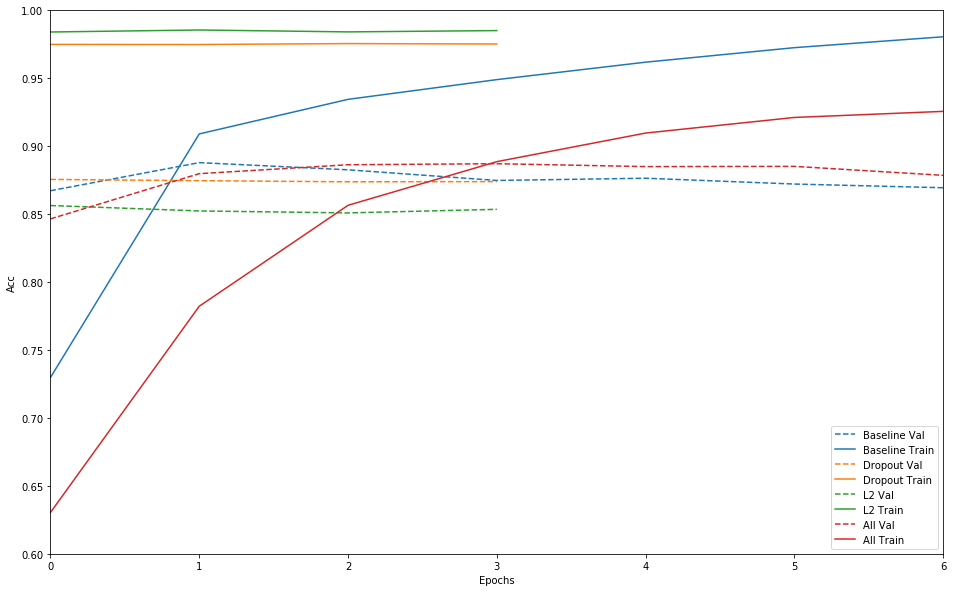

In [31]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history),
              ('l2', l2_model_history),
              ('all', all_model_history)], 'acc', 0.6)

##  Conclusion

Adding dropout is a clear improvement over the baseline model.

To recap: here the most common ways to prevent overfitting in neural networks:

- Get more training data.
- Reduce the capacity of the network.
- Add weight regularization.
- Add dropout.
- And two important approaches not covered in this guide are data-augmentation and batch normalization.